# CS 524
HW1
Sparsh Agarwal
9075905142


Q1.SCS is more accurate of the all.
Clp is the fastest amonst all three as Clp is specialized in solving LP while ECOS solves second-order cone problems and it solves LP by converting the problem to an SOCP which would require more computation and hence more time. Further, SCS (an SDP solver) is relatively slow at solving LPs because it solves them by first converting them to an SDP.

In [35]:
using JuMP, SCS

m = Model(solver=SCSSolver())
@variable(m, 0 <= x1 <= 3 )
@variable(m, 0 <= x2 <= 3 )
@variable(m, 0 <= x3 <= 3 )
@constraint(m, 2x1 ≥ x2 + x3 )
@objective(m, Max, 5x1 - x2 + 11x3 )

status = @time for i = 1:10 solve(m) end

println(m)
println(status)
println()
println("x1 = ", getvalue(x1) )
println("x2 = ", getvalue(x2) )
println("x3 = ", getvalue(x3) )
println("objective = ", getobjectivevalue(m) )

  0.074886 seconds (3.83 k allocations: 238.172 KiB)
Max 5 x1 - x2 + 11 x3
Subject to
 2 x1 - x2 - x3 ≥ 0
 0 ≤ x1 ≤ 3
 0 ≤ x2 ≤ 3
 0 ≤ x3 ≤ 3

nothing

x1 = 2.999985652990818
x2 = 4.149724928776938e-6
x3 = 3.0000130627112176
objective = 48.00006780505256
----------------------------------------------------------------------------
	SCS v1.2.6 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012-2016
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 9
eps = 1.00e-04, alpha = 1.80, max_iters = 20000, normalize = 1, scale = 5.00
Variables n = 3, constraints m = 7
Cones:	linear vars: 7
Setup time: 7.85e-05s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0|      inf       inf       nan      -inf       nan       inf  1.38e-

In [36]:
using JuMP, ECOS

m = Model(solver=ECOSSolver())
@variable(m, 0 <= x1 <= 3 )
@variable(m, 0 <= x2 <= 3 )
@variable(m, 0 <= x3 <= 3 )
@constraint(m, 2x1 ≥ x2 + x3 )
@objective(m, Max, 5x1 - x2 + 11x3 )

status = @time for i = 1:10 solve(m) end

println(m)
println(status)
println()
println("x1 = ", getvalue(x1) )
println("x2 = ", getvalue(x2) )
println("x3 = ", getvalue(x3) )
println("objective = ", getobjectivevalue(m) )

  0.042983 seconds (4.43 k allocations: 268.172 KiB)
Max 5 x1 - x2 + 11 x3
Subject to
 2 x1 - x2 - x3 ≥ 0
 0 ≤ x1 ≤ 3
 0 ≤ x2 ≤ 3
 0 ≤ x3 ≤ 3

nothing

x1 = 2.999999998571697
x2 = 8.223270011736391e-9
x3 = 3.0000000001977236
objective = 47.999999986810174

ECOS 2.0.5 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  -2.250e+01  -8.440e+01  +1e+02  2e-01  3e-01  1e+00  1e+01    ---    ---    1  1  - |  -  - 
 1  -4.615e+01  -5.603e+01  +2e+01  2e-02  6e-02  7e-01  3e+00  0.8410  6e-02   0  0  0 |  0  0
 2  -4.726e+01  -4.850e+01  +3e+00  3e-03  8e-03  2e-01  4e-01  0.9283  7e-02   0  0  0 |  0  0
 3  -4.799e+01  -4.803e+01  +8e-02  1e-04  2e-04  7e-03  1e-02  0.9798  9e-03   1  0  0 |  0  0
 4  -4.800e+01  -4.800e+01  +9e-04  1e-06  3e-06  8e-05  1e-04  0.9890  1e-04   1  0  0 |  0  0
 5  -4.800e+01  -4.800e+01  +9e-06  1e-08  3e-08  9e-07  1e-06  0.9890  1e-04 

In [37]:
using JuMP, Clp

m = Model(solver=ClpSolver())
@variable(m, 0 <= x1 <= 3 )
@variable(m, 0 <= x2 <= 3 )
@variable(m, 0 <= x3 <= 3 )
@constraint(m, 2x1 ≥ x2 + x3 )
@objective(m, Max, 5x1 - x2 + 11x3 )

status = @time for i = 1:10 solve(m) end

println(m)
println(status)
println()
println("x1 = ", getvalue(x1) )
println("x2 = ", getvalue(x2) )
println("x3 = ", getvalue(x3) )
println("objective = ", getobjectivevalue(m) )

  0.006321 seconds (390 allocations: 27.000 KiB)
Max 5 x1 - x2 + 11 x3
Subject to
 2 x1 - x2 - x3 ≥ 0
 0 ≤ x1 ≤ 3
 0 ≤ x2 ≤ 3
 0 ≤ x3 ≤ 3

nothing

x1 = 3.0
x2 = 0.0
x3 = 3.0
objective = 48.0


Q2. a)Below are the equations which would help maximize the profit.

In [38]:
using JuMP, Clp

m = Model(solver=ClpSolver())
@variable(m, w >= 0 )
@variable(m, c >= 0 )
@constraint(m, 0 <= 3w + 2c <= 100)
@constraint(m, 0 <= 2w + 4c <= 120)
@constraint(m, 0 <= w + c <= 45)
@objective(m, Max, 200w + 300c )

status = @time for i = 1:10 solve(m) end

println(m)
println(status)
println()
println("wheat = ", getvalue(w) )
println("corn = ", getvalue(c) )
println("Labor = ", getvalue(3w + 2c) )
println("Fertilizer = ", getvalue(2w + 4c) )
println("Profit = ", getobjectivevalue(m) )

  0.007479 seconds (390 allocations: 26.359 KiB)
Max 200 w + 300 c
Subject to
 0 ≤ 3 w + 2 c ≤ 100
 0 ≤ 2 w + 4 c ≤ 120
 0 ≤ w + c ≤ 45
 w ≥ 0
 c ≥ 0

nothing

wheat = 19.99999999999999
corn = 20.000000000000007
Labor = 99.99999999999999
Fertilizer = 120.0
Profit = 10000.0


Q2. b)Same solution obtained as in part a.

In [39]:
# the types of crops produced
crop = [:wheat, :corn]

# Labor required for each type of crop
Labor   = Dict( :wheat => 3, :corn => 2)

# Fertilizers required for each type of crop
Fertilizer = Dict( :wheat => 2, :corn => 4)

# profit made for each crop
profit = Dict( :wheat => 200, :corn => 300)

# quantities in each resourse
num_Labor     = 100
num_Fertilizer = 120
num_land = 45
;

In [40]:
using JuMP, Clp
m = Model(solver = ClpSolver())

@variable(m, land[crop] >= 0 ) 

@expression(m, tot_Labor, sum(land[i] * Labor[i] for i in crop) )
@expression(m, tot_Fertilizer,    sum(land[i] * Fertilizer[i]    for i in crop) )
@expression(m, tot_profit,  sum(land[i] * profit[i]  for i in crop) )

@constraint(m, land[:wheat] + land[:corn] <= num_land ) 
@constraint(m, tot_Labor <= num_Labor )         
@constraint(m, tot_Fertilizer <= num_Fertilizer )        

@objective(m, Max, tot_profit)

solve(m)
println(getvalue(land))
println("Total profit will be \$", getvalue(tot_profit))
println("Total Labor used is ", getvalue(tot_Labor), " workers")
println("Total Fertilizers used is ", getvalue(tot_Fertilizer), " tons")

land: 1 dimensions:
[wheat] = 19.99999999999999
[ corn] = 20.000000000000007
Total profit will be $10000.0
Total Labor used is 99.99999999999999 workers
Total Fertilizers used is 120.0 tons


Q3. c)Same solution obtained as in past a and b.

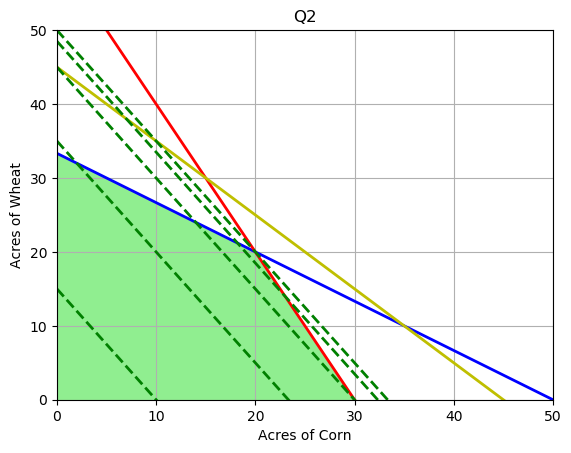

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.patches.Polygon object at 0x133b25510>

In [41]:
using PyPlot 

c = linspace(0,50,100) # returns an array of 100 evenly spaced numbers over the interval [-10, 10].

w1 = (100-2*c)/3
w2 = 60-2*c
w3 = 45-c
w4 = (10000 - 300c)/200
w5 = (9700 - 300c)/200
w6 = (9000 - 300c)/200
w7 = (7000 - 300c)/200
w8 = (3000 - 300c)/200

plot(c, w1, "b", linewidth = 2)
hold 
plot(c, w2, "r", linewidth = 2)
hold 
plot(c, w3, "y", linewidth = 2)
hold
plot(c, w4, "g--", linewidth = 2)
hold
plot(c, w5, "g--", linewidth = 2)
hold
plot(c, w6, "g--", linewidth = 2)
hold
plot(c, w7, "g--", linewidth = 2)
hold
plot(c, w8, "g--", linewidth = 2)

xlim([0, 50])
ylim([0, 50])

grid() # adds grid lines 
xlabel("Acres of Corn") 
ylabel("Acres of Wheat")
title("Q2")

fill([0, 0, 20, 30], [0,33.33,20, 0], color= "lightgreen")